In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

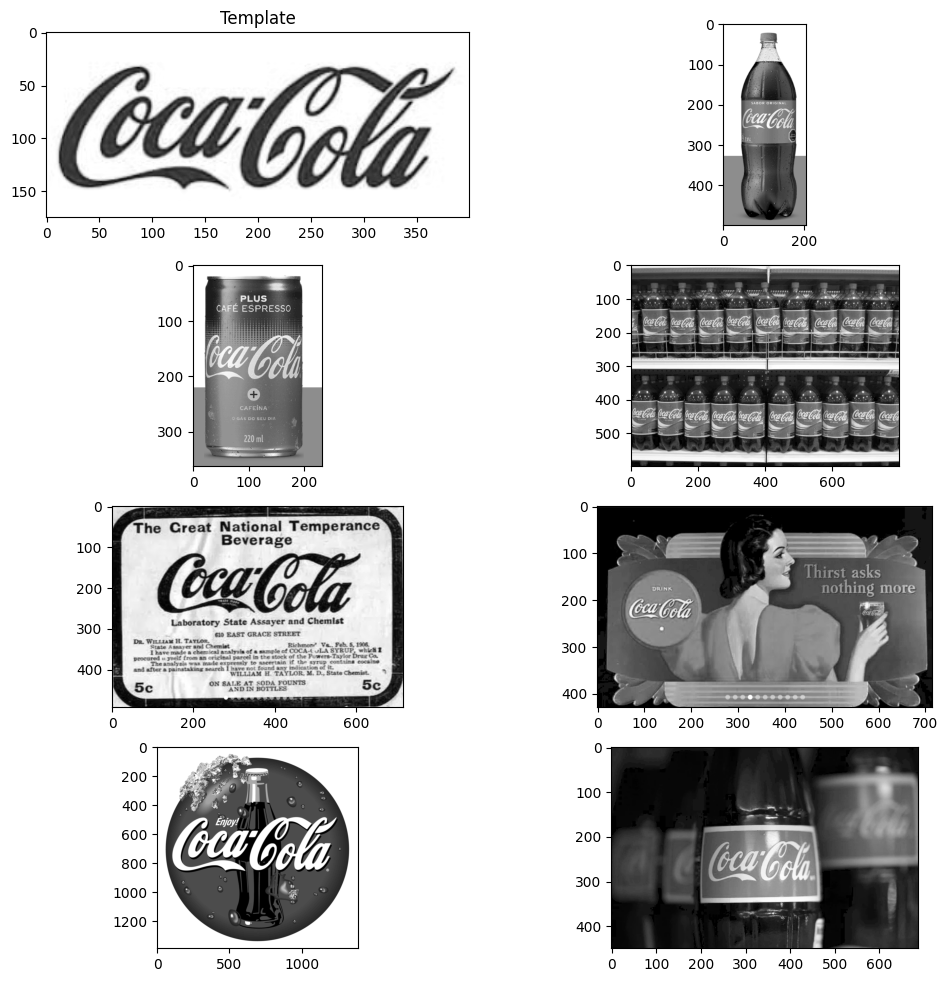

In [3]:
template = cv.imread('template/pattern.png',cv.IMREAD_GRAYSCALE)

images =[]
images.append(cv.imread('images/coca_logo_1.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/coca_logo_2.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/coca_multi.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/coca_retro_1.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/coca_retro_2.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/COCA-COLA-LOGO.jpg',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/logo_1.png',cv.IMREAD_GRAYSCALE))

plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Template')
plt.imshow(template, cmap='gray')
for i in np.arange(0,7):
    plt.subplot(4,2,i+2)
    plt.imshow(images[i], cmap='gray')
plt.show

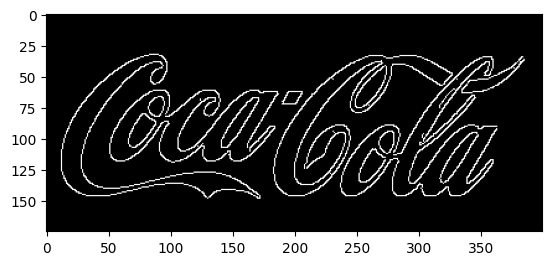

In [4]:
template_edges = cv.Canny(template, threshold1=5, threshold2=200)
plt.figure()
plt.imshow(template_edges,cmap = 'gray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

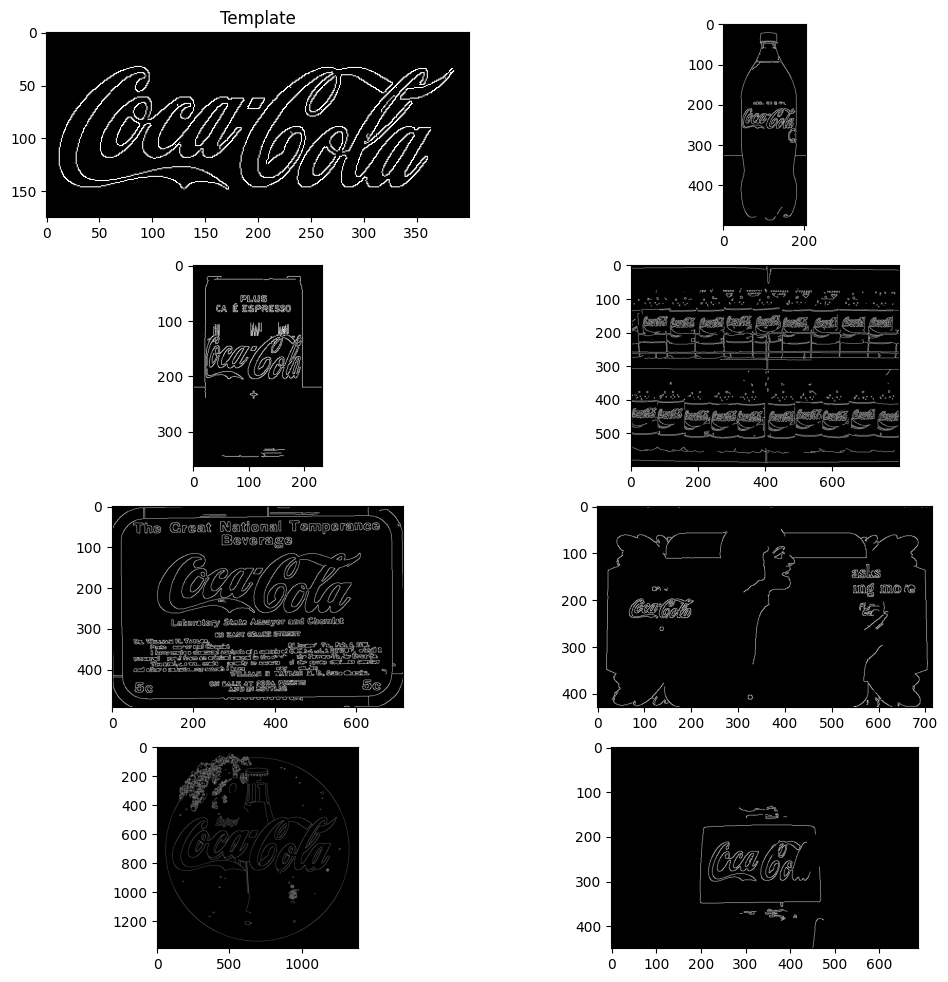

In [5]:
images_edges=[]
for img in images:
    images_edges.append(cv.Canny(img, threshold1=200, threshold2=550))

plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Template')
plt.imshow(template_edges, cmap='gray')
for i in np.arange(0,7):
    plt.subplot(4,2,i+2)
    plt.imshow(images_edges[i], cmap='gray')
plt.show

In [8]:
"""img=5
w,h=template_edges.shape[::-1]
wi, hi = images_edges[img].shape[::-1]
print(min(wi/w,hi/h))


scales = np.linspace(0.1, min(wi/w,hi/h), 10)
resized_template = list()

# generamos nuestra "piramide" de tamaños arbitrarios
print(f'Dimensiones generadas:')
for scale in scales:
    resized_template.append(cv.resize(template_edges, None, fx=scale, fy=scale))
    print(resized_template[-1].shape)


"""
def buscador_logos(template_edges,img_edges):
    w,h=template_edges.shape[::-1]
    wi, hi = img_edges.shape[::-1]
    scales = np.linspace(0.1, min(wi/w,hi/h), 50)
    resized_template = list()
    # generamos nuestra "piramide" de tamaños arbitrarios
    for scale in scales:
        resized_template.append(cv.resize(template_edges, None, fx=scale, fy=scale))

    # Hago una copia de la imagen porque le dibujo rectángulos
    img_salida = img_edges.copy()

    max_val_final=0
    template_final=None
    top_left=None
    bottom_right=None
    resultado=None

    for templ in resized_template:
        wt, ht = templ.shape[::-1]
        if (wt<wi) and (ht<hi):
            # Aplicamos la coincidencia de patrones
            #--------------------------------------
            res = cv.matchTemplate(img_edges, templ, cv.TM_CCOEFF)
            
            # Encontramos los valores máximos y mínimos
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
            if max_val>max_val_final:
                max_val_final=max_val
                template_final=templ
                top_left=max_loc
                bottom_right = (top_left[0] + wt, top_left[1] + ht)
                resultado=res
    print(max_val_final)
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    cv.rectangle(img_salida,top_left, bottom_right, 255, 2)

    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()

    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.suptitle(f'Tamaño template={template_final.shape})')
    plt.show()

21174996.0


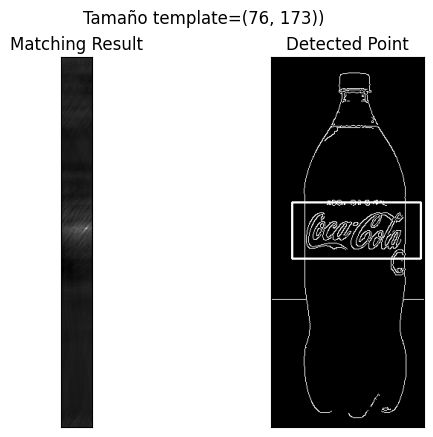

9435122.0


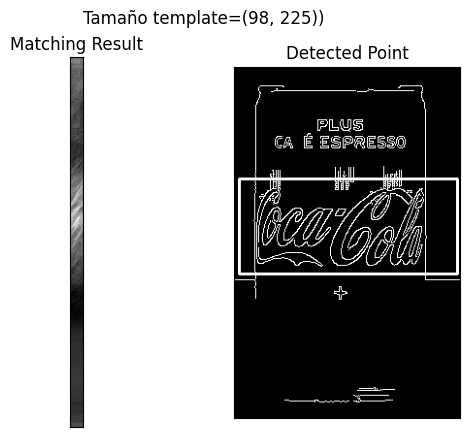

48847676.0


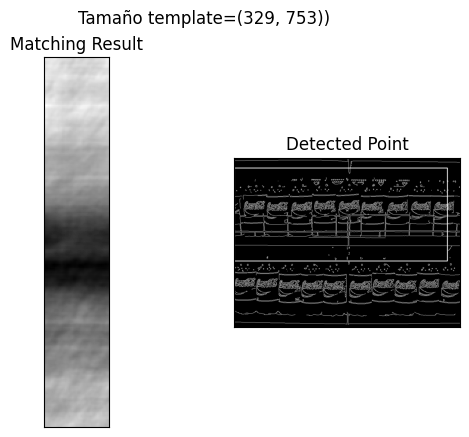

41203676.0


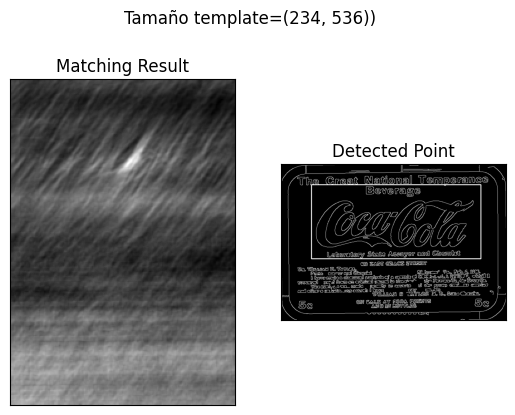

17419590.0


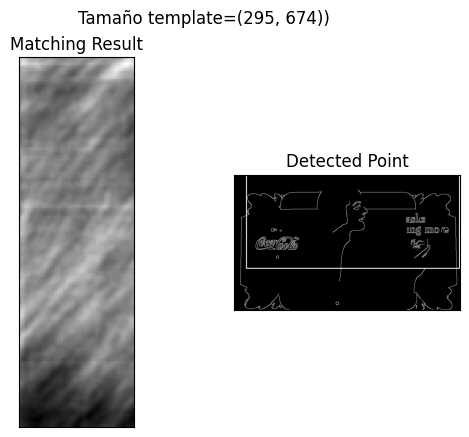

120558416.0


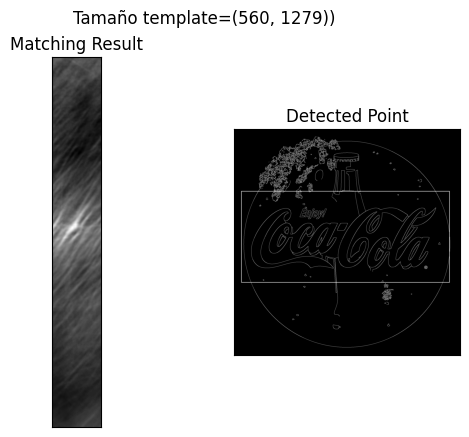

17679490.0


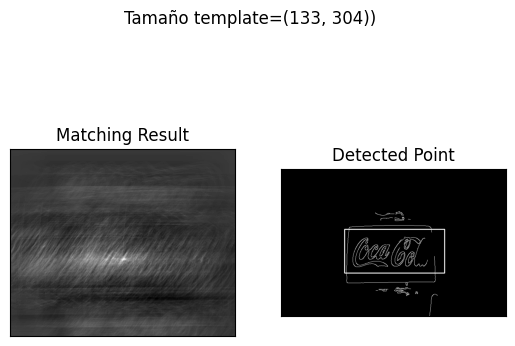

In [13]:
for img in images_edges:
 buscador_logos(template_edges,img)